## Visualizations and inshights Drawn From the Data

### The strategy for drawing insights from the data is to view the heatmap of all the numeric features, and create scatter plots for the features that have some significant correlation and try to determine what this correlation means. 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("Final_Data.csv")
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd. set_option('display.max_rows', 30)

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.describe().T

count        mean         std   min         25%         50%         75%         max
Strikes Landed                           1365.0  278.602198  321.149485  0.00   66.000000  166.000000  363.000000  2975.00000
Strikes Attempted                        1365.0  627.204396  722.214268  1.00  148.000000  359.000000  807.000000  6324.00000
Takedowns Landed                         1365.0    4.476190    9.252030  0.00    0.000000    1.000000    5.000000    90.00000
Takedowns Attempted                      1365.0   18.873260   29.423307  0.00    3.000000    8.000000   23.000000   274.00000
Significant strikes per Minute           1365.0    3.325282    1.527311  0.00    2.270000    3.220000    4.190000    12.07000
Significant strikes Absorbed per minute  1365.0    3.655458    1.446198  0.13    2.670000    3.480000    4.400000     8.98000
Takedown Average                         1365.0    1.270029    1.334034  0.00    0.250000    0.920000    1.860000     8.93000
Submission Average                       1365.0    0.589509    0.846089  0.00    0.000000    0.310000    0.840000     7.38000
Significant Strike Defense               1365.0    0.532249    0.091278  0.13    0.480000    0.540000    0.590000     0.87000
Takedown Defense                         1365.0    0.620476    0.208792  0.08    0.500000    0.630000    0.760000     1.00000
Knockdown Average                        1365.0    0.349304    0.551874  0.00    0.000000    0.140000    0.520000     5.34000
Average Fight Time                       1365.0   10.406930    3.275743  1.52    8.170000   10.580000   12.830000    20.00000
Standing Position Strikes                1365.0    0.690366    0.191677  0.00    0.590000    0.720000    0.840000     1.00000
Clinch Position Strikes                  1365.0    0.160425    0.127998  0.00    0.070000    0.130000    0.220000     1.00000
Ground Position Strikes                  1365.0    0.147231    0.150374  0.00    0.040000    0.100000    0.200000     1.00000
Wins by KO                               1365.0    0.315260    0.271460  0.00    0.000000    0.290000    0.500000     1.00000
Wins by Submission                       1365.0    0.226110    0.212294  0.00    0.000000    0.200000    0.360000     0.95000
Wins by Decision                         1365.0    0.214286    0.226728  0.00    0.000000    0.160000    0.370000     1.00000
Strikes to Head                          1365.0  178.037363  210.661455  0.00   37.000000  103.000000  229.000000  2040.00000
Strikes To Body                          1365.0   56.466667   69.842123  0.00   13.000000   31.000000   73.000000   681.00000
Strikes To Leg                           1365.0   44.098168   60.116266  0.00    8.000000   22.000000   54.000000   508.00000
wins                                     1365.0   13.942125    6.854287  0.00    9.000000   13.000000   18.000000    40.00000
losses                                   1365.0    5.174359    3.431195  0.00    3.000000    5.000000    7.000000    21.00000
draws                                    1365.0    0.171429    0.497712  0.00    0.000000    0.000000    0.000000     6.00000
Win percentage                           1365.0    0.728181    0.105457  0.00    0.666667    0.724138    0.800000     1.00000
Striking Accuracy                        1365.0    0.446058    0.098687  0.00    0.390663    0.447236    0.507937     0.73913
Takedown Accuracy                        1248.0    0.165941    0.209114  0.00    0.000000    0.090909    0.278186     1.00000
Total Fights                             1365.0   19.287912    9.567627  3.00   12.000000   18.000000   24.000000    56.00000

## Heatmap

<AxesSubplot:>

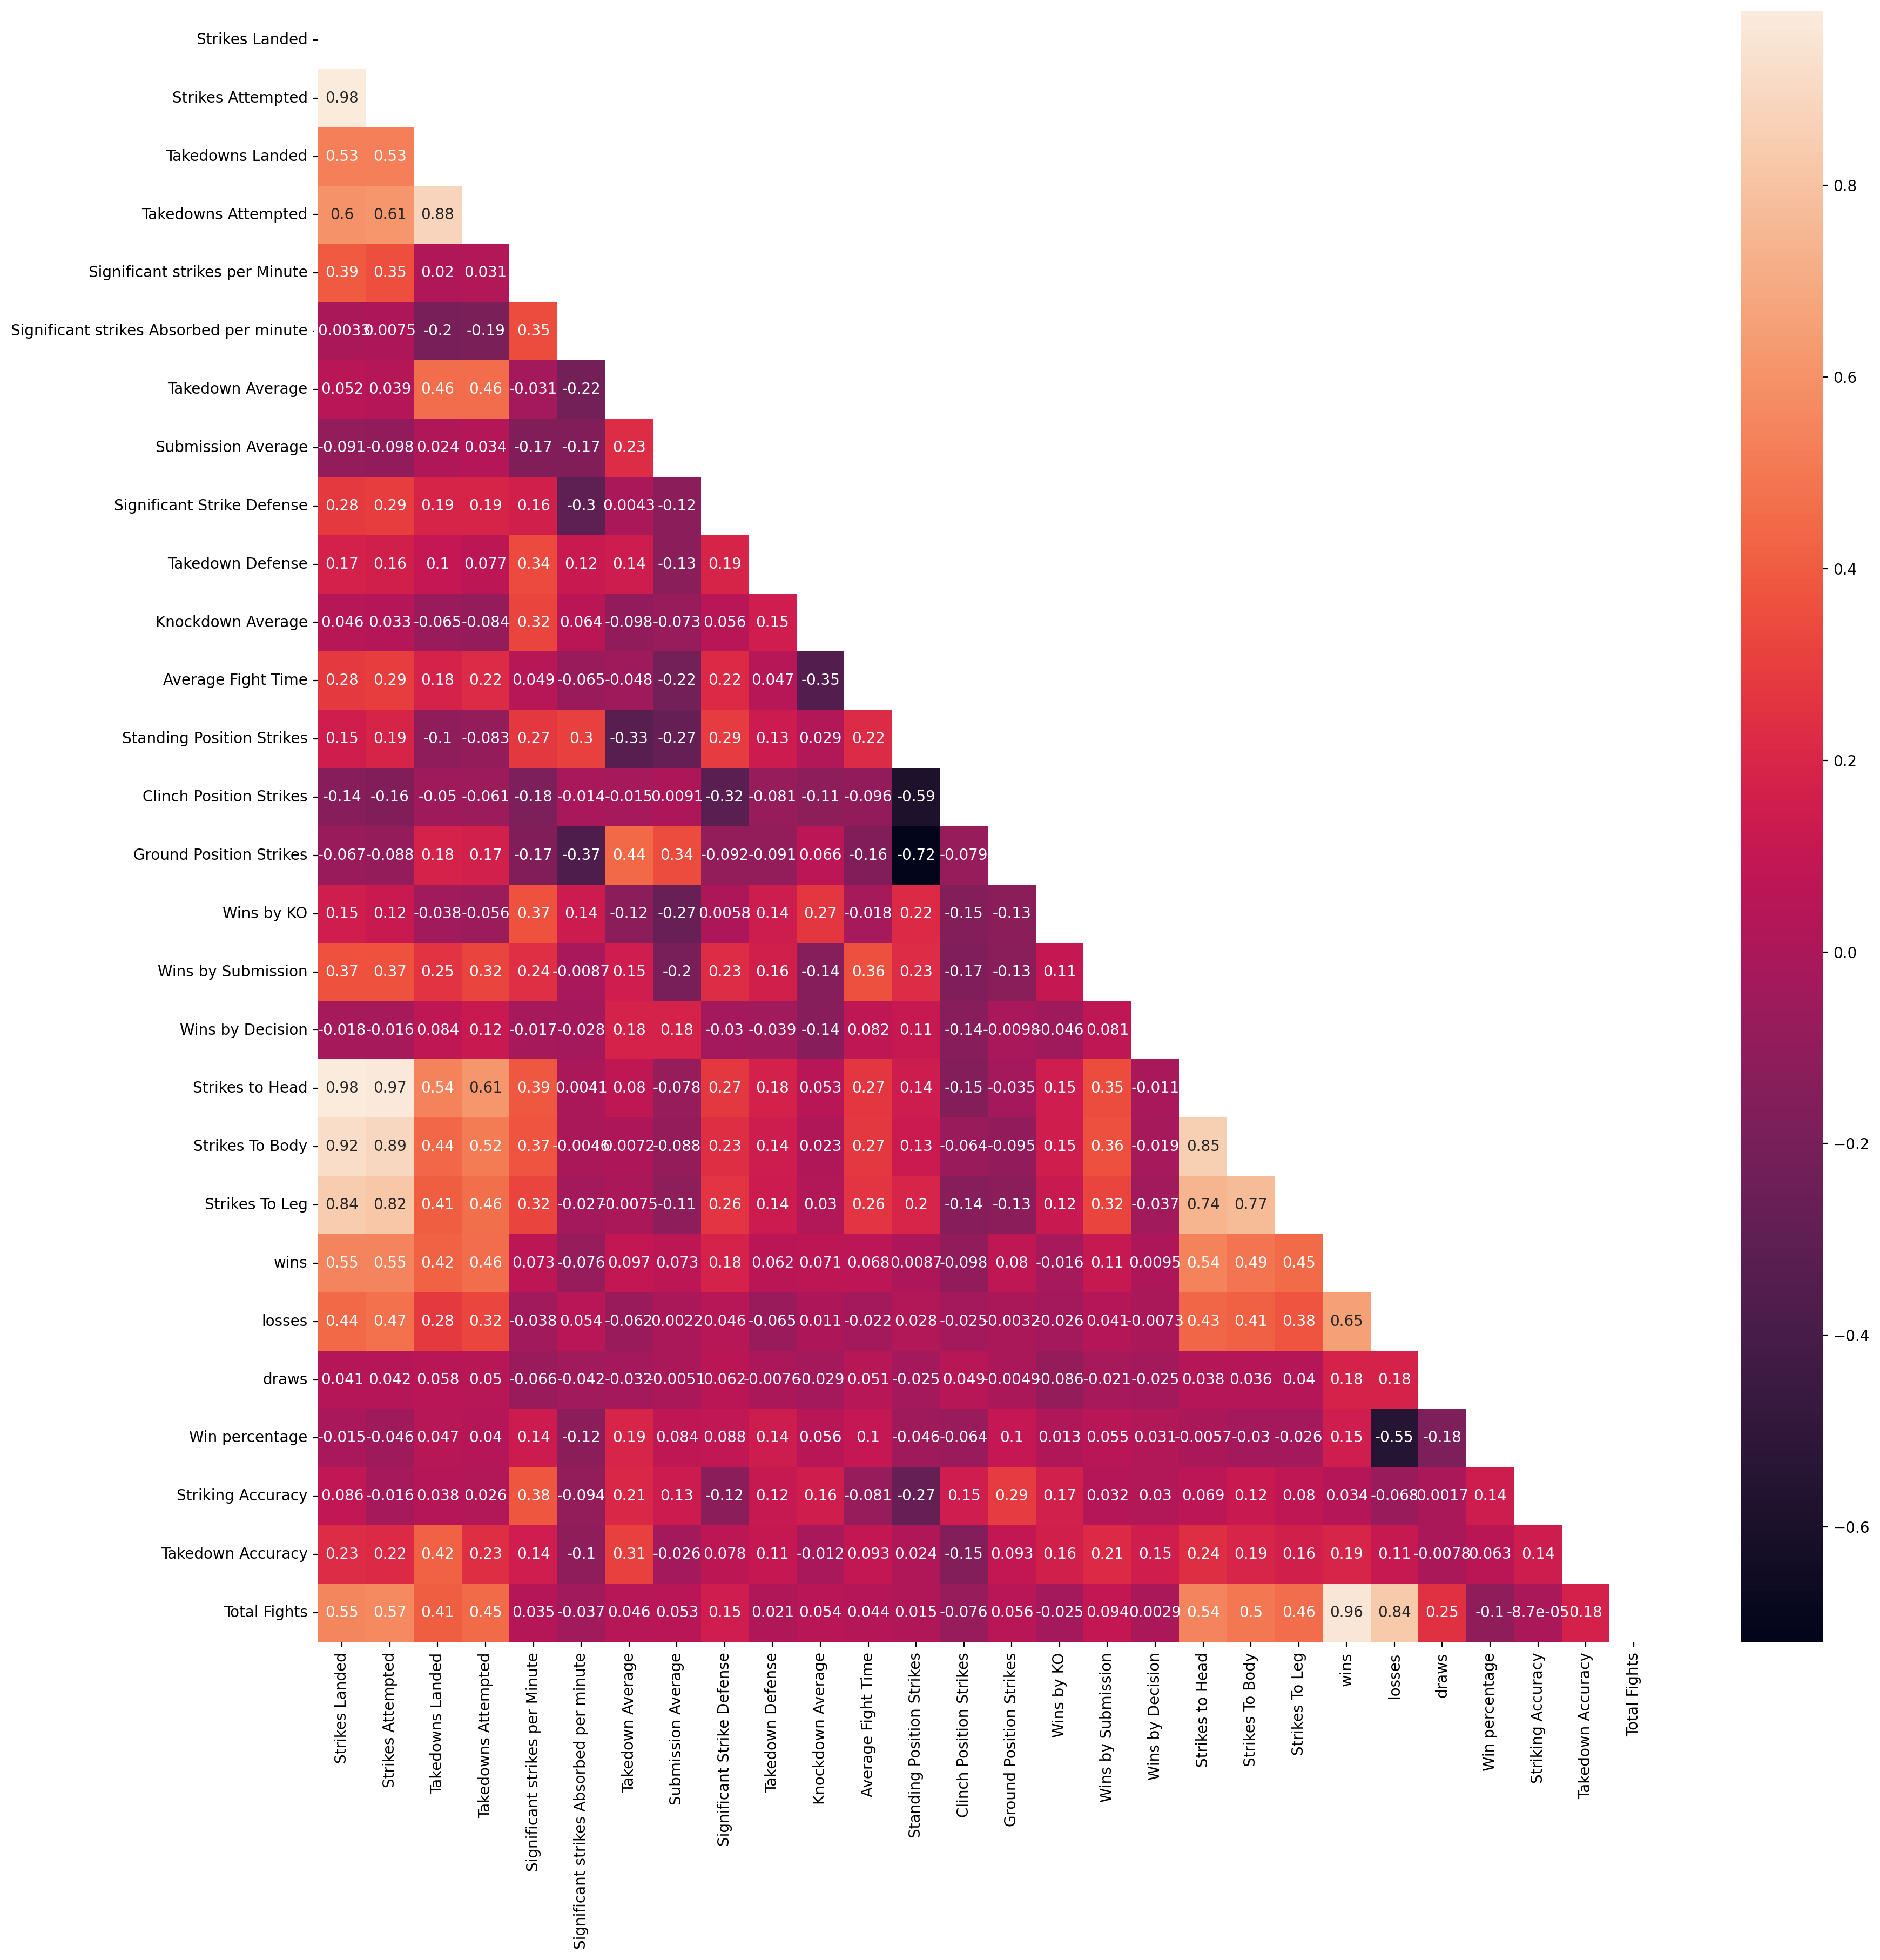

In [31]:
plt.figure(figsize=(20,20), dpi=200)
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

## Significant strikes Absorbed per minute

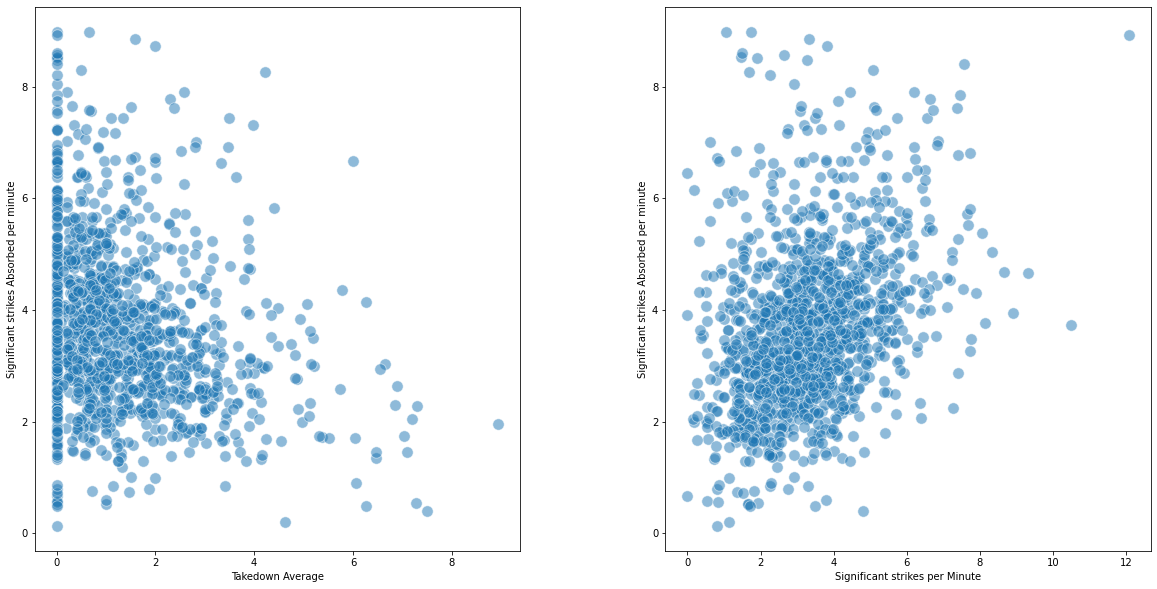

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Takedown Average", y="Significant strikes Absorbed per minute", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Significant strikes per Minute", y="Significant strikes Absorbed per minute", data = df, ax=axes[1],s=130, alpha=0.5);

### Fighters with a better takedown average absorb less signifficant strikes whereas fighters with better striking ability absorb more significant strikes. It seems that fighters who specialize more in takedownas and grappling absorb less damage.

## TD average

<AxesSubplot:xlabel='Takedown Average', ylabel='Significant strikes Absorbed per minute'>

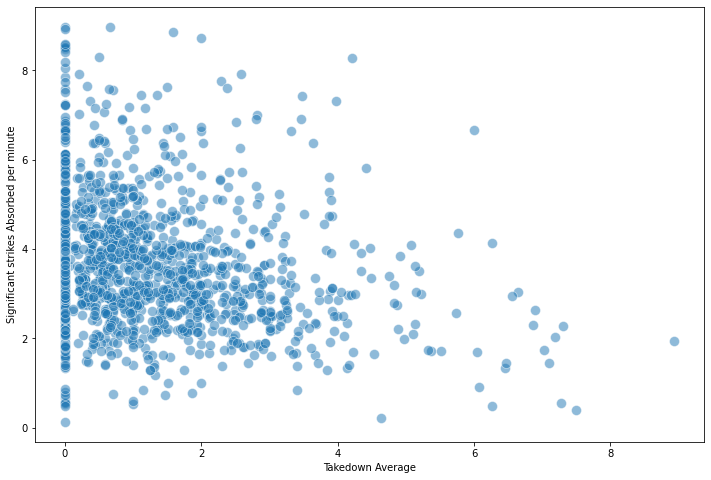

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Takedown Average',y='Significant strikes Absorbed per minute',data=df, s=100, alpha=0.5) 

### There is a negative correlation indicating that as the amount of takedowns a fighter can land over a 15 minute period increases the amount of significant strikes the fighter absorbs decreases. This is most likely because a fighters who can land takedowns more consistently are more likely able to gain a dominanat position where their opponenet cannot hit them easily. This may also indicate that mastering the ability takedown an opponent and having a strategy that focuses on the takedown is good if fighters want to avoid taking damage and increase the longevity of their career as it appears that fighters who have a high of amount of takedown skill get hit less. 

## Significant Strike Defense

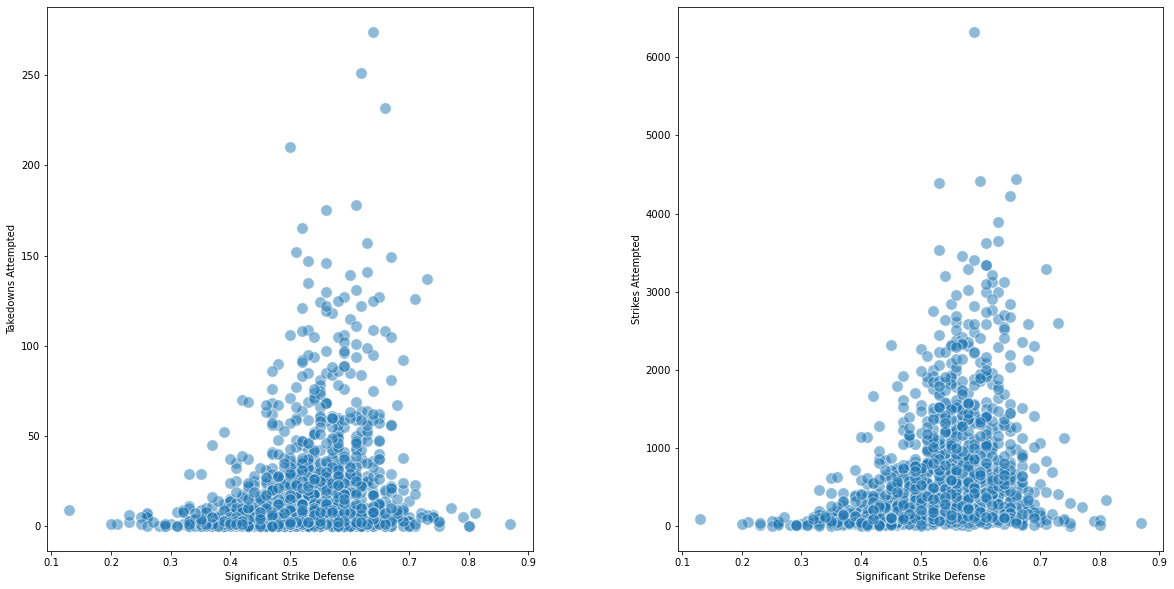

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Significant Strike Defense", y="Takedowns Attempted", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Significant Strike Defense", y="Strikes Attempted", data = df, ax=axes[1],s=130, alpha=0.5);

### People with higher significant strike defense are able to accumalate more total takedown and striking attempts than other fighters across their career. This means that having better sig strike defense can lead a fighter to having a longer career, and participating in more fights.

# Total Fights

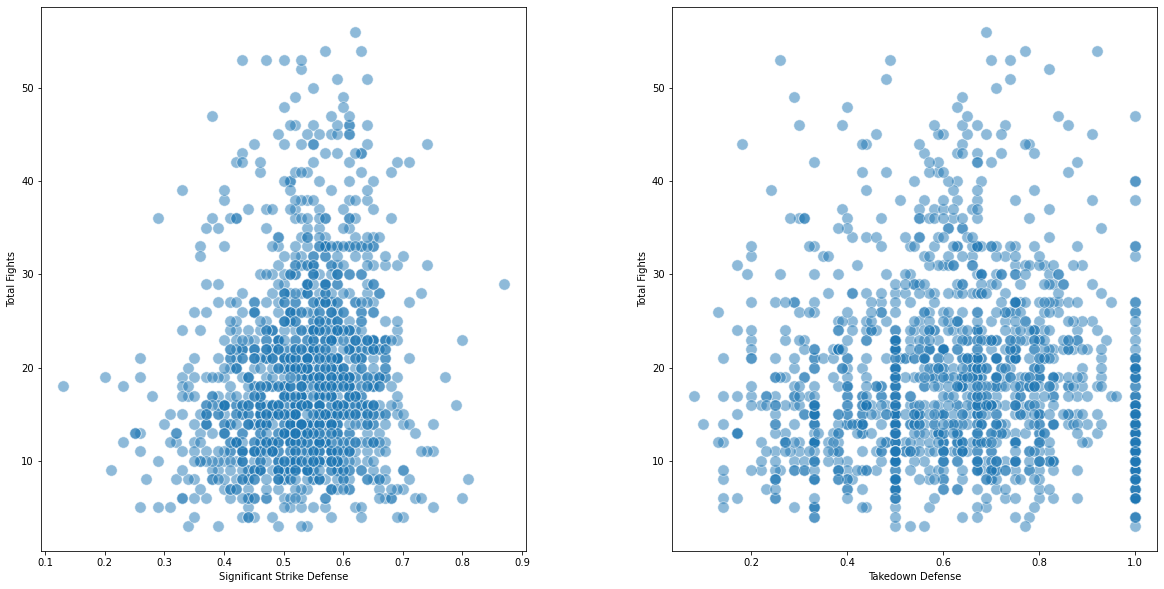

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Significant Strike Defense", y="Total Fights", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Takedown Defense", y="Total Fights", data = df, ax=axes[1],s=130, alpha=0.5);

### Some correlation is present in both graphs indicating fighters with better significant strike defense and takedown defense are able to participate in more fights meaning that a better significant strike defense can improve the longevity of a fighter.

## Takedown Defense

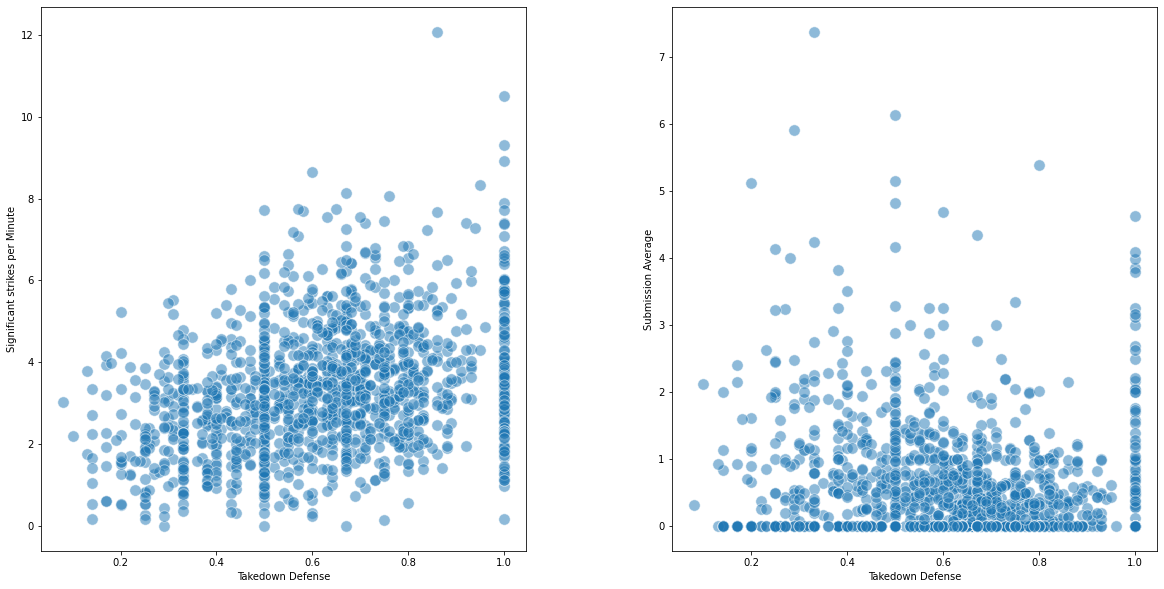

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Takedown Defense", y="Significant strikes per Minute", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Takedown Defense", y="Submission Average", data = df, ax=axes[1],s=130, alpha=0.5);

### This reveals that a common strategy among ufc fighters. The striking specialists and really good strikers typically have good takedownn defense because they want to only strike not wrestle so they avoid it all together by having really good TD defense.

# Knockdown Average

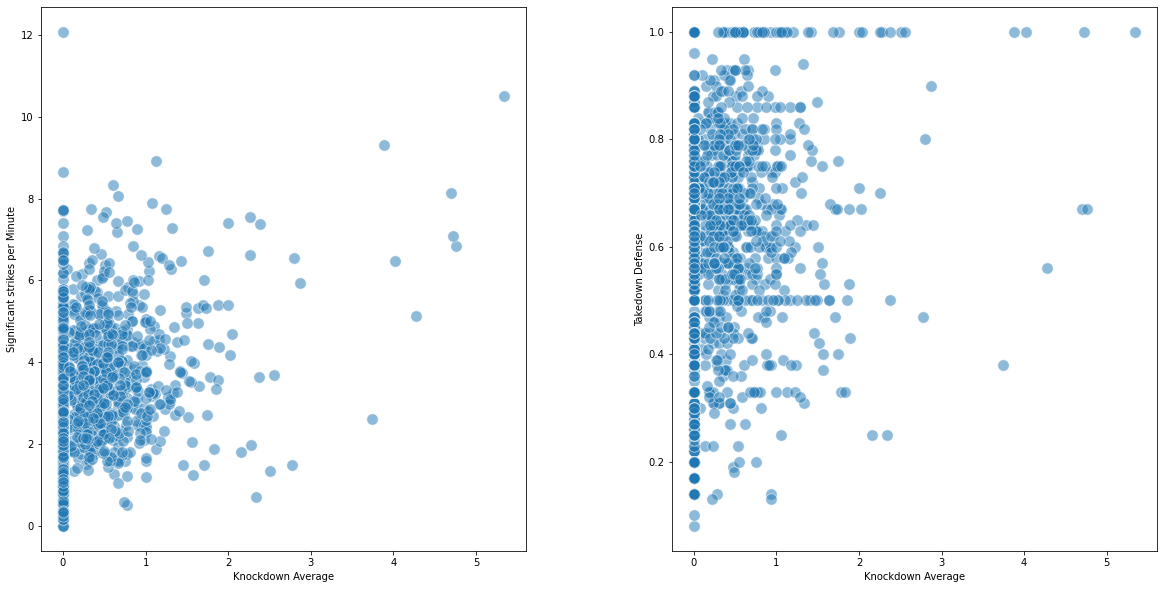

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Knockdown Average", y="Significant strikes per Minute", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(y="Takedown Defense", x="Knockdown Average", data = df, ax=axes[1],s=130, alpha=0.5);

### Fighters with higher knockdown averages seem to have higher Takedown defense and Significant str per minute. Fighters with really high knockdown average have really good takedown defense meaning really good strikers don't want to wrestle and want to avoid it by defending the takedown as much as possible

# Average Fight Time

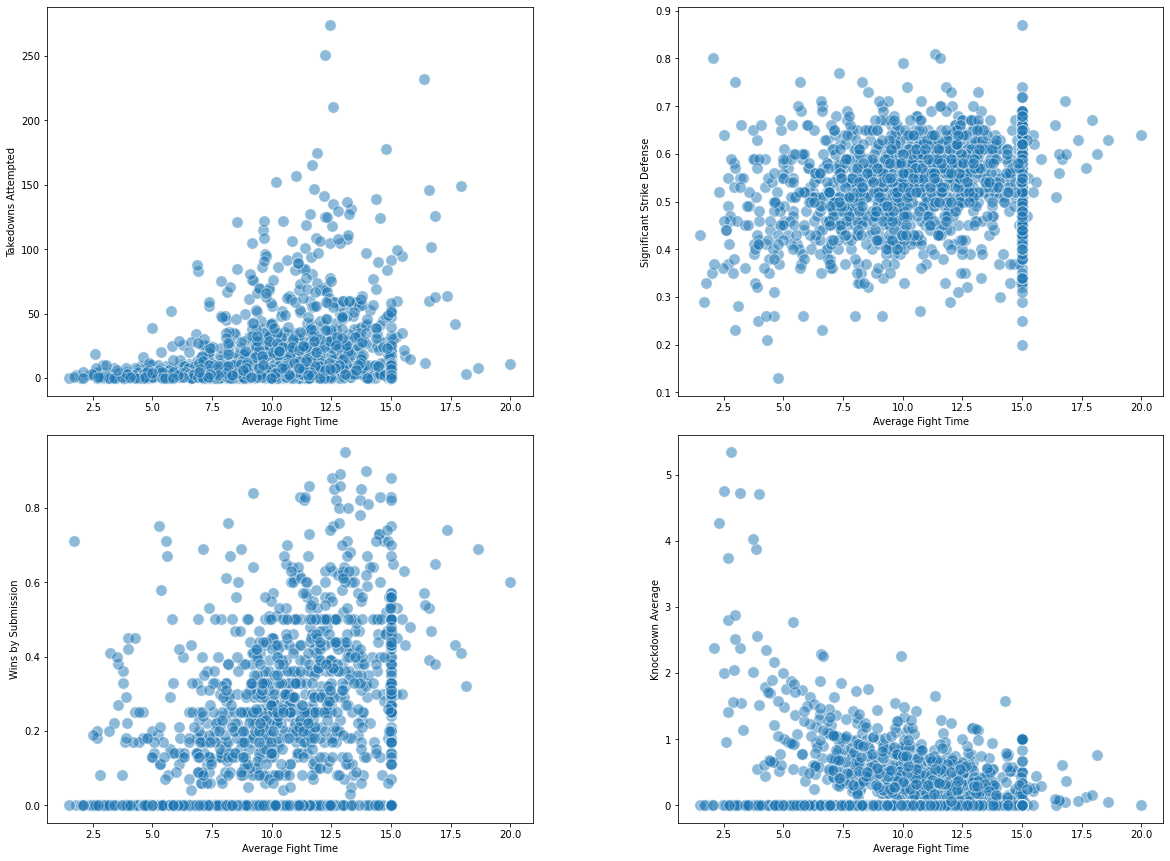

In [22]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Average Fight Time", y="Takedowns Attempted", data = df, ax=axes[0][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Average Fight Time", y="Significant Strike Defense", data = df, ax=axes[0][1],s=130, alpha=0.5);
sns.scatterplot(x="Average Fight Time", y="Wins by Submission", data = df, ax=axes[1][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Average Fight Time", y="Knockdown Average", data = df, ax=axes[1][1],s=130, alpha=0.5);

### Higher fight time means fighters might be looking for submissions more, and people with higher fight times is correlated to fighters attempting more takedowns. This means that fighters whose strategy, skills revolve around takedowns are likely to have a longer fight. 

### People with higher fight times are more likely to have more wins by submission. This means that as the fight time gets longer it is more likely to favor the fighter who has expertise performing submissions. This is because submissions take time to setup and complete

### As the average fight time for a fighter increases it is less that a fighter has a high knockdown average. This means that most fighters with high average fight times are most likely not expert strikers, and that expert strikers do not want for the fight to last longer and want it to be completed quickly. This is most likely because expert strikers rely on explosive energy to perform powerful strikes which significantly decreases as the fight gets longer which is not in their favor.

## Win by Submission

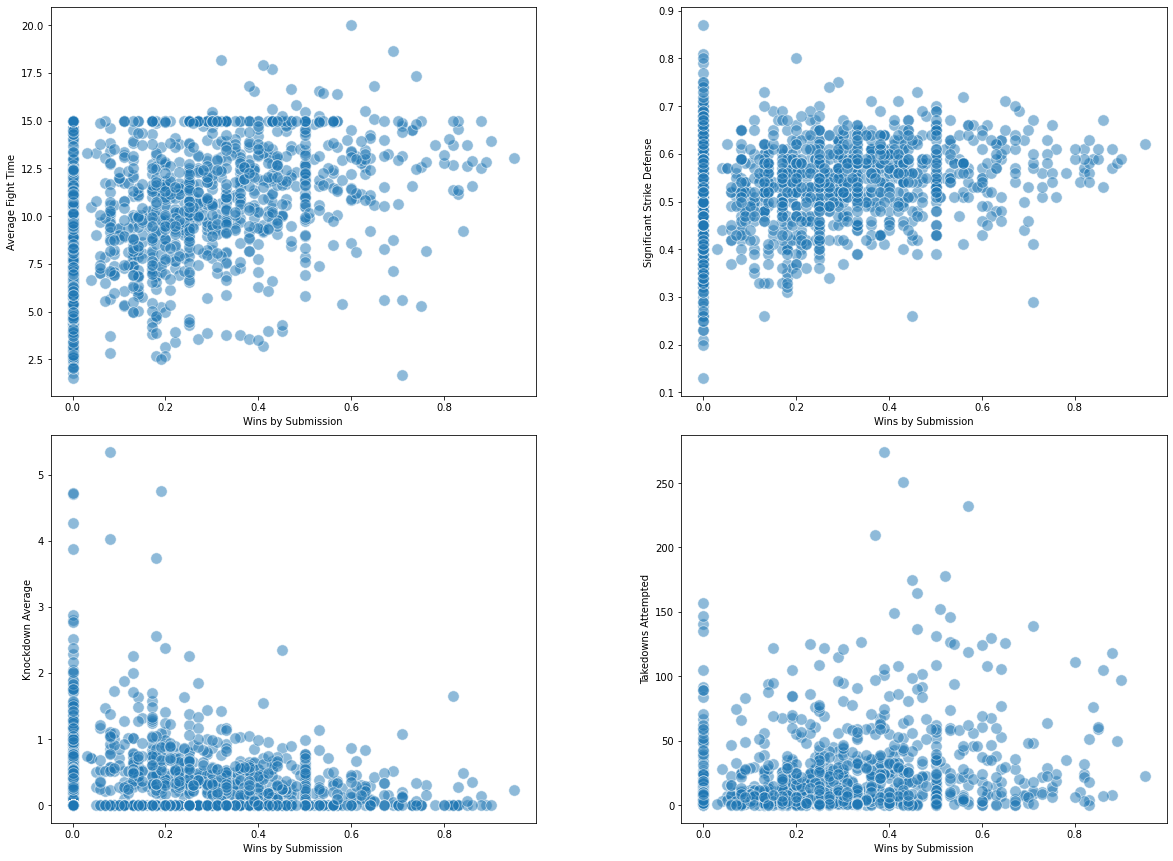

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Wins by Submission", y="Average Fight Time", data = df, ax=axes[0][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Wins by Submission", y="Significant Strike Defense", data = df, ax=axes[0][1],s=130, alpha=0.5);
sns.scatterplot(x="Wins by Submission", y="Knockdown Average", data = df, ax=axes[1][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Wins by Submission", y="Takedowns Attempted", data = df, ax=axes[1][1],s=130, alpha=0.5);

### Once again fighters with a lot of wins by submission have a higher average fight time. This means a longer fight is in their benefit. This is most likely because submissions take time to setup and work better when their opponent is tired which can be achieved with lengthier fights.

### Once again we can see that fighters with a speciality in submission have excellent significant striking defense which is mostly likely because they want to grapple and not strike in the fight. So they will avoid it by having good striking defense.

### Fighters with more wins by submission appear to have higher significant strike defense. This is most likely because the strategy of the fighter revovlves around their grappling and they do not plan to use their striking too much to help inflict damage on their opponent. As a result they focus heavily on being able to defend from strikes so they do not get KOed and can go forward to use their grappling.

### Most grappling specialists do not have as much expertise on striking. Their game plan revolves around their grappling and as a result they do not strike as much meaning they do not score a lot of knockdowns which is why their knockdown average is lower the more wins by submission a fighter has.

# Wins By Decision

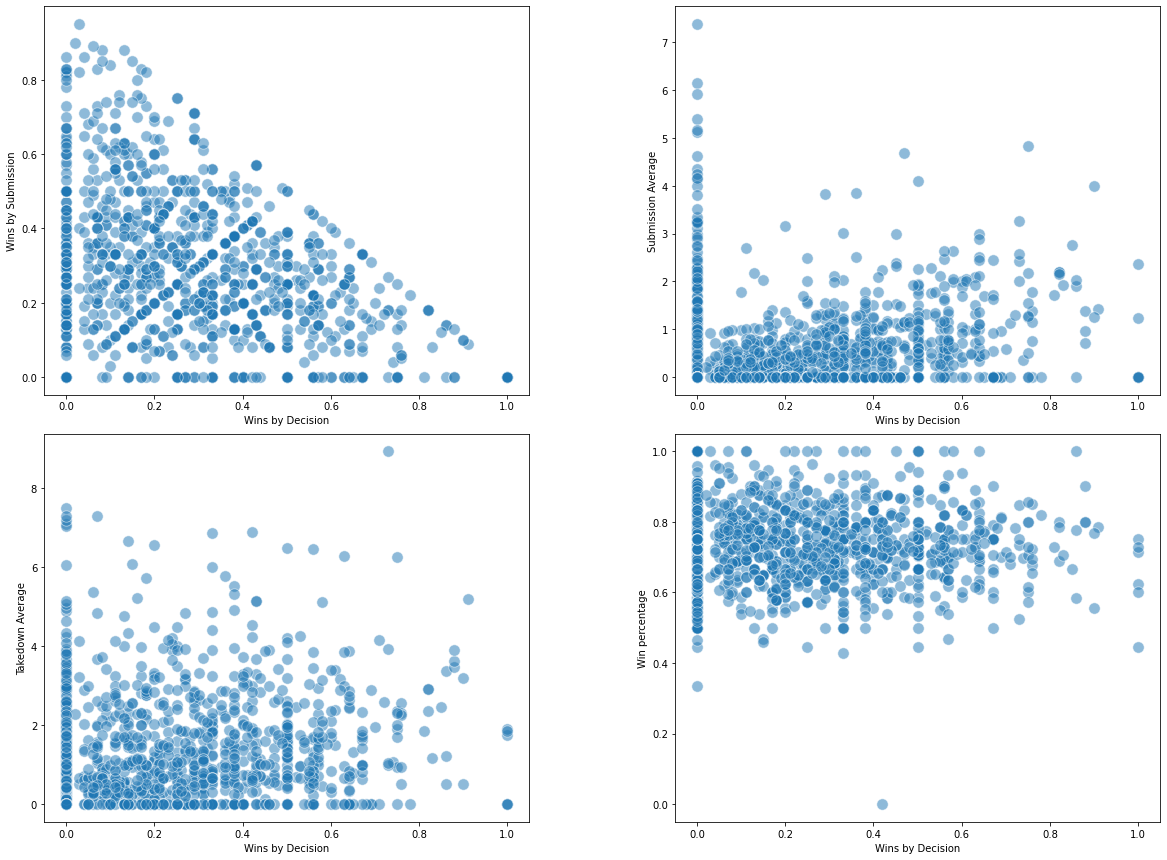

In [27]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Wins by Decision", y="Wins by Submission", data = df, ax=axes[0][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Wins by Decision", y="Submission Average", data = df, ax=axes[0][1],s=130, alpha=0.5);
sns.scatterplot(x="Wins by Decision", y="Takedown Average", data = df, ax=axes[1][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Wins by Decision", y="Win percentage", data = df, ax=axes[1][1],s=130, alpha=0.5);

### There is a correlation  that indicates that the more wins a fighter has by decision the higher a submission average the fighter has. This means that fighters whose strategy, and specialities are in submissions eithier get the win by submission or held enough dominanace over their opponent to get the win by decision. So if a fighter is mostly specilaised in grappling longer fights favor them.

# Strikes To The Head

<AxesSubplot:xlabel='Strikes to Head', ylabel='Takedowns Attempted'>

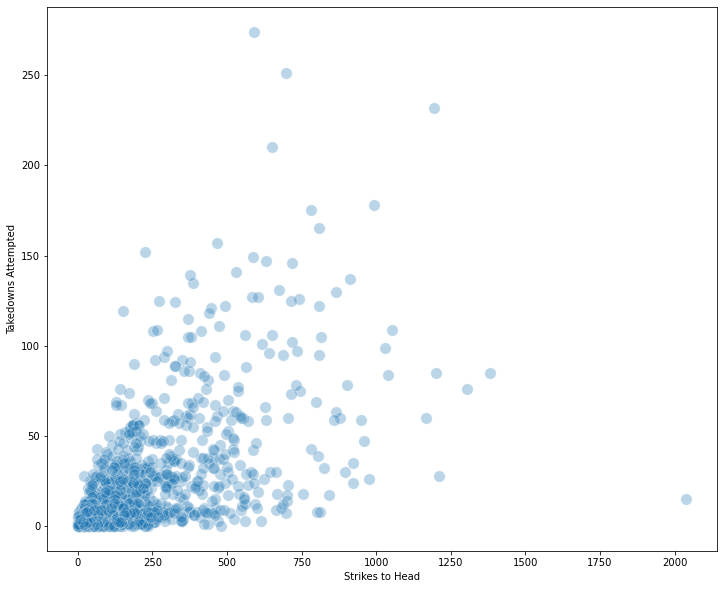

In [28]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Strikes to Head" , y='Takedowns Attempted', data=df,s=130,alpha=0.3 )

### This plot shows that fighters have accumalated a lot of strikes to head also attempt a lot of takedowns. This is indicative of a stratgey that appears to be common in mma fights. The strategy is for fighters to throw several strikes to the head and then one time fake a strike to the head and go for a easy takedown. This means that fighers who has an opponent who is good at takedowns should be aware that this strategy can be used against them.

### It also may indicate that hitting the head is a lot easier once the opponenet is taken to the ground.

# Striking Accuracy

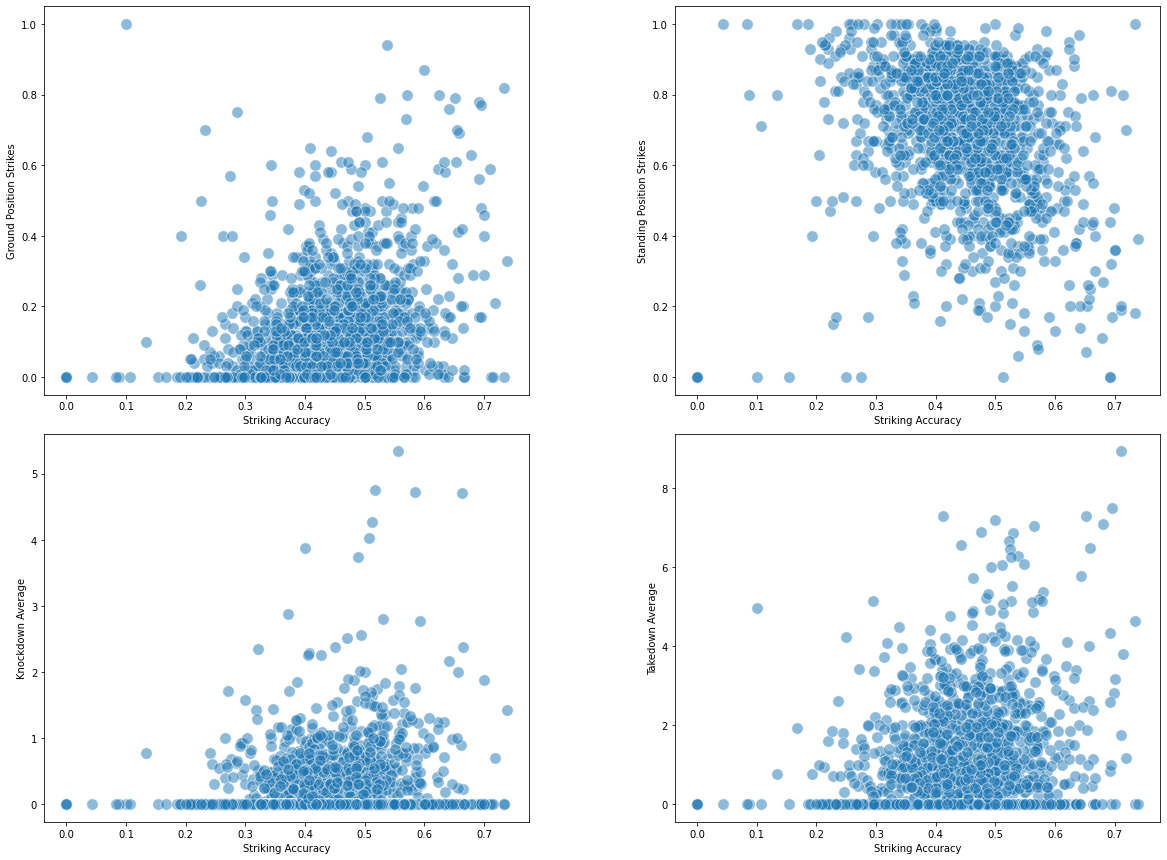

In [33]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Striking Accuracy", y="Ground Position Strikes", data = df, ax=axes[0][0] ,s=130,alpha=0.5);
sns.scatterplot(x="Striking Accuracy", y="Knockdown Average", data = df, ax=axes[1][0],s=130, alpha=0.5);
sns.scatterplot(x="Striking Accuracy", y="Standing Position Strikes", data = df, ax=axes[0][1] ,s=130,alpha=0.5);
sns.scatterplot(x="Striking Accuracy", y="Takedown Average", data = df, ax=axes[1][1],s=130, alpha=0.5);

### Fighters with higher striking accuracy have accumalated a higher number of ground positon strikes. This means that when a fighter is striking an opponenet in a grounded possition they can do it with a high level of accuracy. This most likely consists of fighters whose expertise is grappling as they will be the fighetrs who can establish a dominant ground position to deliver these high accuracy ground strikes. 

### This shows that fighters who have a high striking accuracy actually perform less strikes from the standing possition indicating that the fighters with the highest striking accuracy are not actually a majority of striking experts but a majority of grappling experts.

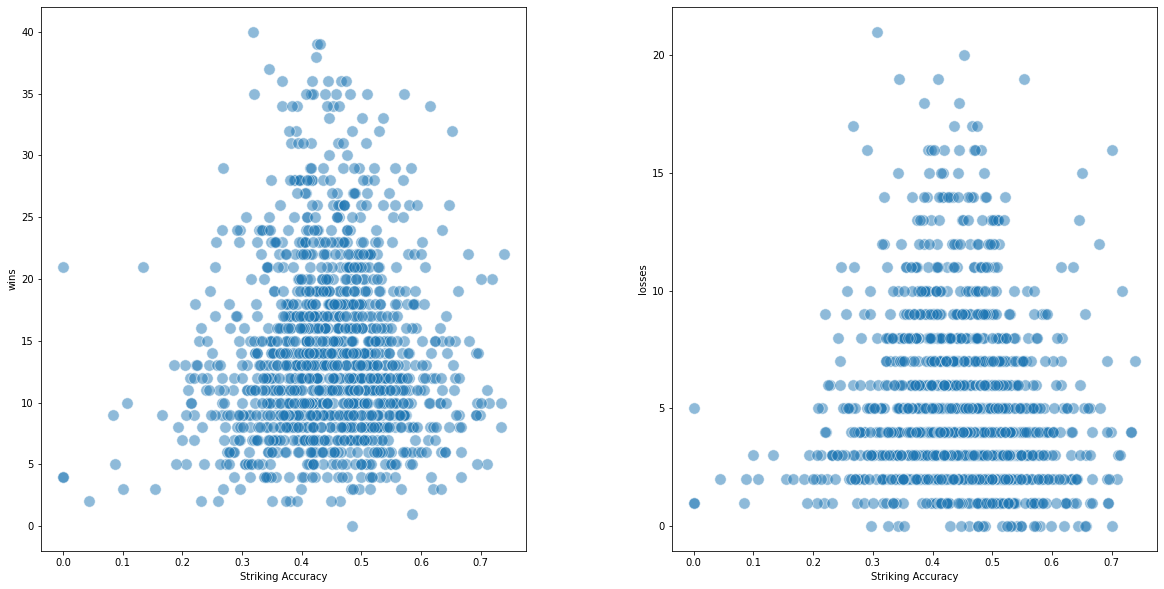

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Striking Accuracy", y="wins", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Striking Accuracy", y="losses", data = df, ax=axes[1],s=130, alpha=0.5);

### There is little correlation between striking accuracy and wins and strking accuracy and losses indicating that fighters who are striking experts have more inconsistent outcomes to their matches.

# Wins By KO

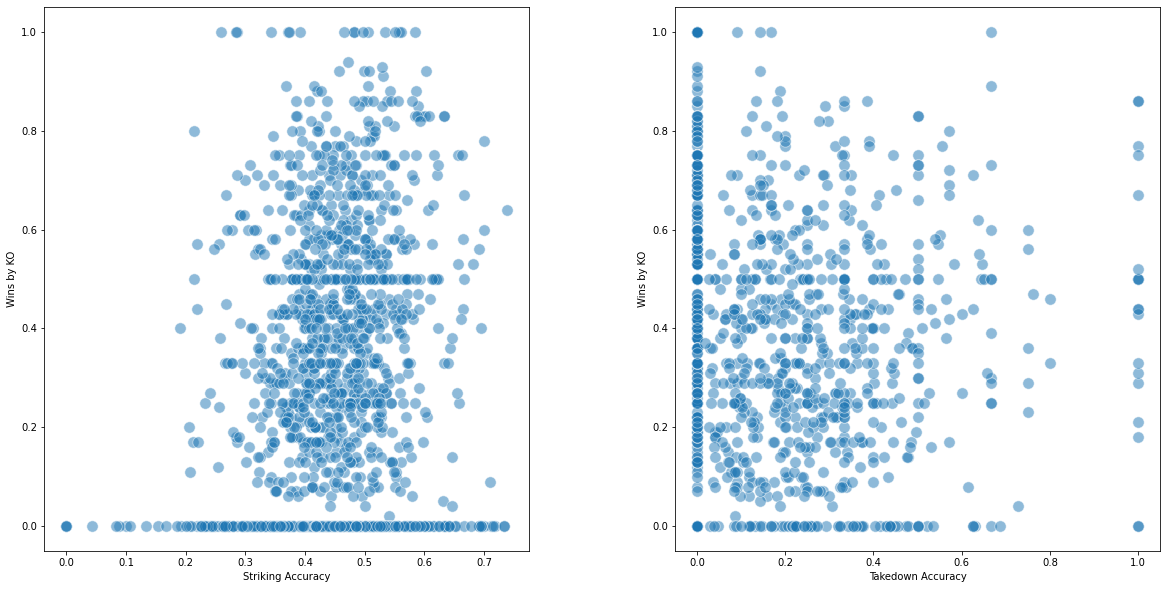

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Striking Accuracy", y="Wins by KO", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Takedown Accuracy", y="Wins by KO", data = df, ax=axes[1],s=130, alpha=0.5);

### Here it can be seen that there is little to no correlation between the accuracy of a striker and the amount of wins they have by KO. But there is some correlation between takedown accuracy and Wins by KO on the right. This means that fighters who have expertise in the takedown are more likely to get a KO than fighters who specialize in striking. 

# Wins by Submission

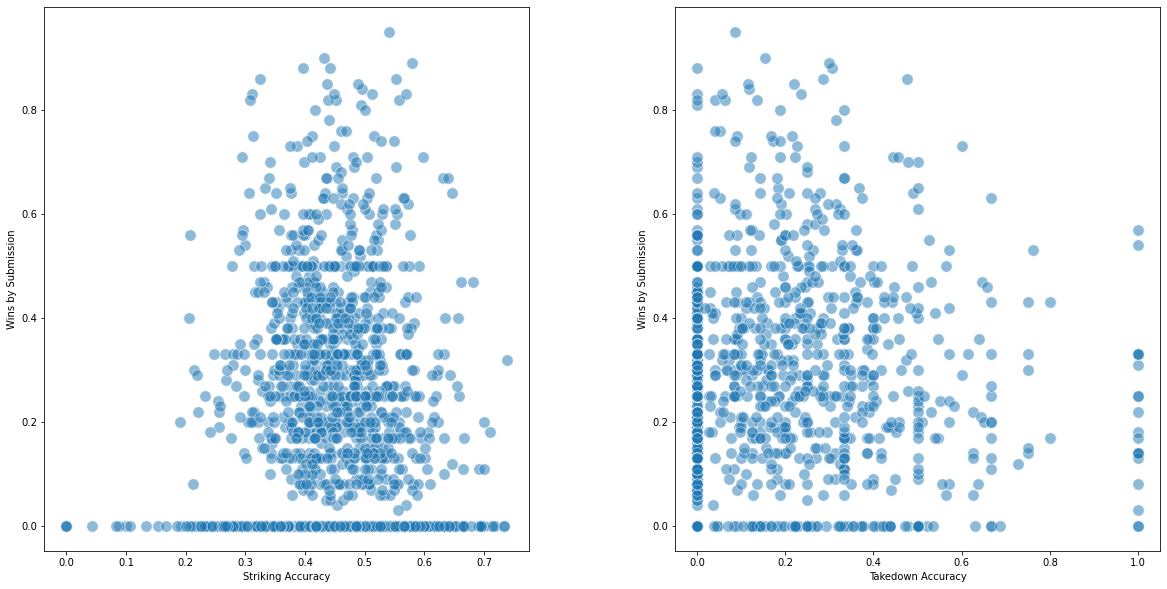

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Striking Accuracy", y="Wins by Submission", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Takedown Accuracy", y="Wins by Submission", data = df, ax=axes[1],s=130, alpha=0.5);

### There is some correlation in the second graph showing fighters with higher takedown accuracy are more likely to win by submission as a fighter who can succesfully perform a takedown can more often put themself in a good position to perform a submission.

# Wins by Decision

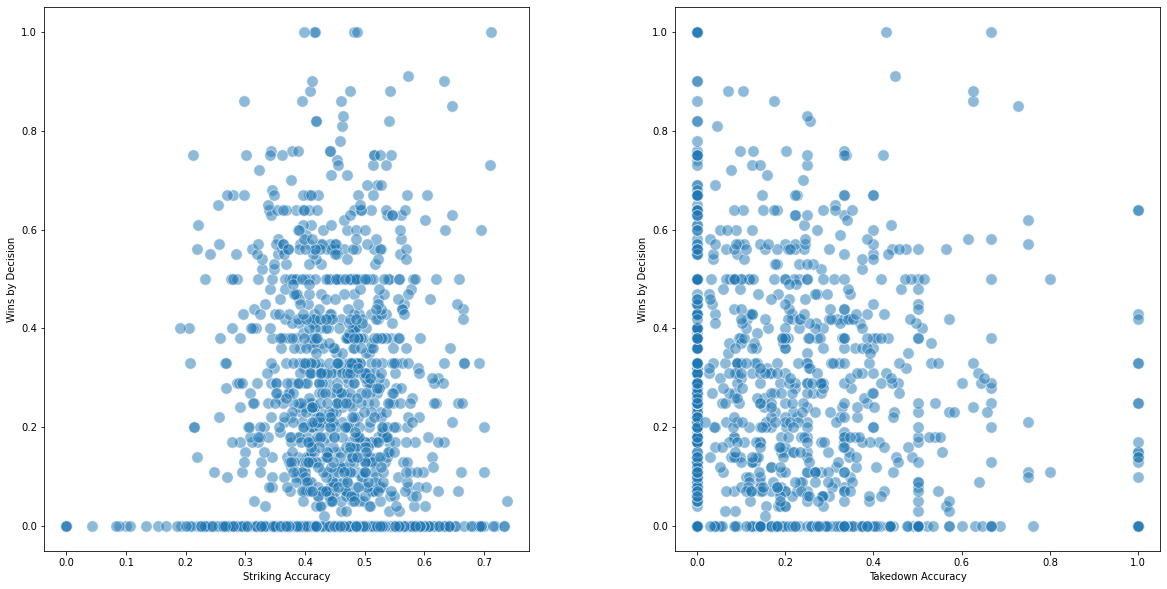

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Striking Accuracy", y="Wins by Decision", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Takedown Accuracy", y="Wins by Decision", data = df, ax=axes[1],s=130, alpha=0.5);

### Some correlaition in the secnd graph showing fighters with higher takedown accuracy are more liley to win by decision as a fighter who can succesfully perform a takedown can more often can hold a dominanat position for a longer period of time in the fight resulting in a win by decision.

# Win Percentage

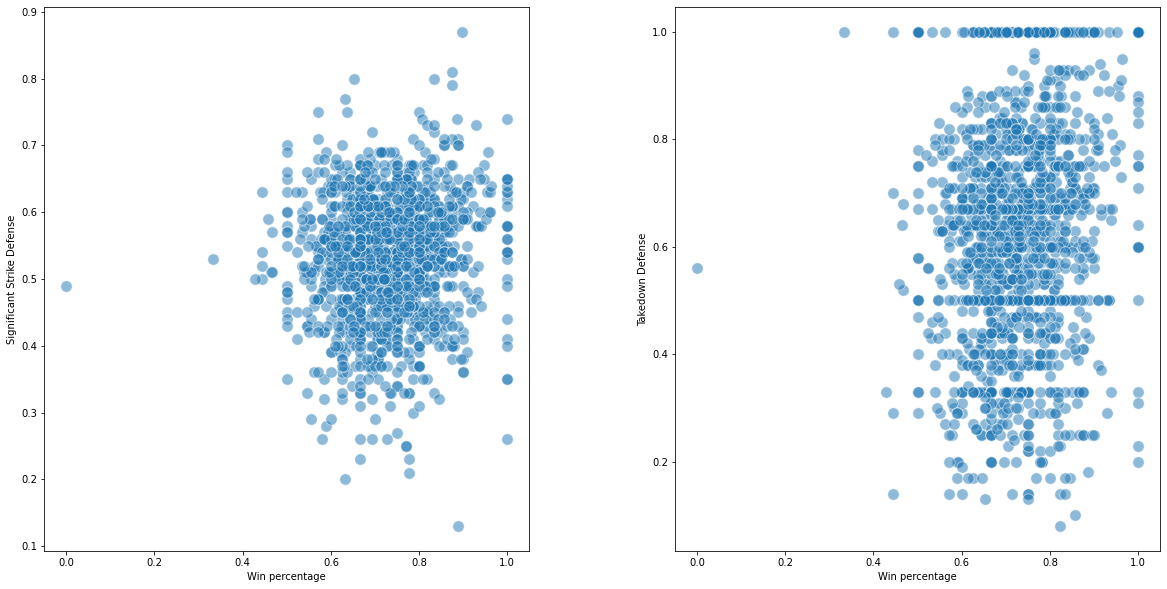

In [44]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Win percentage", y="Significant Strike Defense", data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(x="Win percentage", y="Takedown Defense", data = df, ax=axes[1],s=130, alpha=0.5);

### Not a very strong correlation between these features

<AxesSubplot:xlabel='Win percentage', ylabel='Takedown Average'>

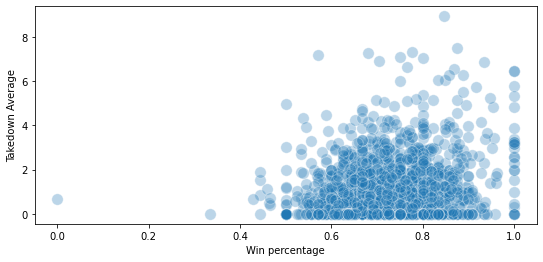

In [8]:
plt.figure(figsize=(9,4))
sns.scatterplot(x="Win percentage" , y='Takedown Average', data=df,s=130,alpha=0.3 )

## Win Percentage

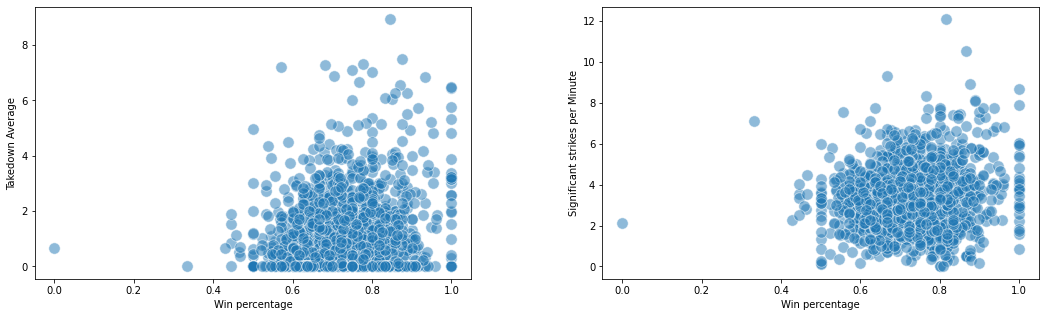

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(18,5))

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

sns.scatterplot(x="Win percentage" , y='Takedown Average', data = df, ax=axes[0] ,s=130,alpha=0.5);
sns.scatterplot(y="Significant strikes per Minute",x="Win percentage", data = df, ax=axes[1],s=130, alpha=0.5);

### There is some correlation in the graph on the left indicating that the more skilled a fighter is at perofrming take downs the higher their win rate becomes. While this correlation also exists regarding the significant strikes landed per minute in the graph on the right, the correlation is stronger in the graph on the left.